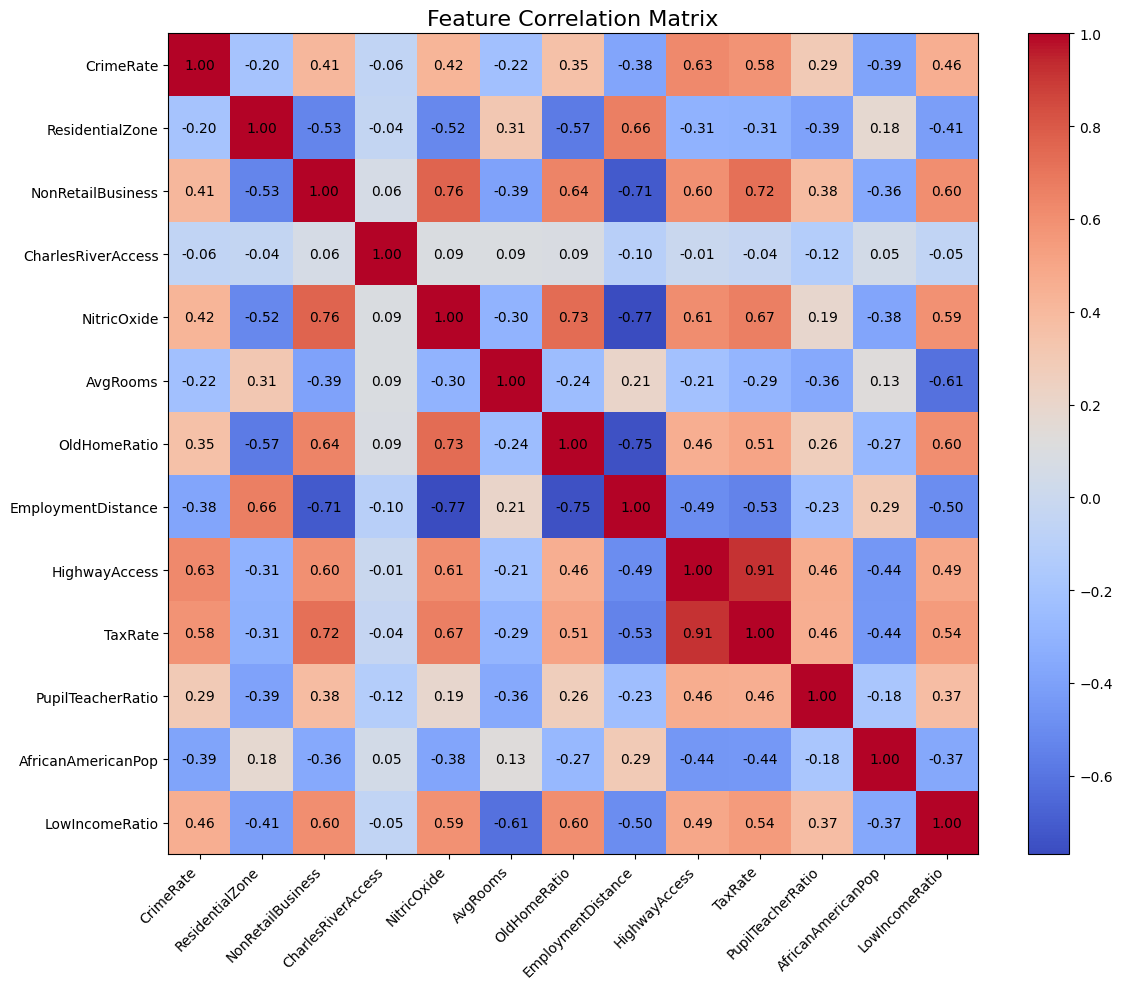


Columns with high correlation (|corr| > 0.6):
['AvgRooms', 'CrimeRate', 'EmploymentDistance', 'HighwayAccess', 'LowIncomeRatio', 'NitricOxide', 'NonRetailBusiness', 'OldHomeRatio', 'ResidentialZone', 'TaxRate']

Model Performance Metrics:
Mean Absolute Error: $3569.97
Mean Squared Error: $26362421.95
R² Score: 0.6405


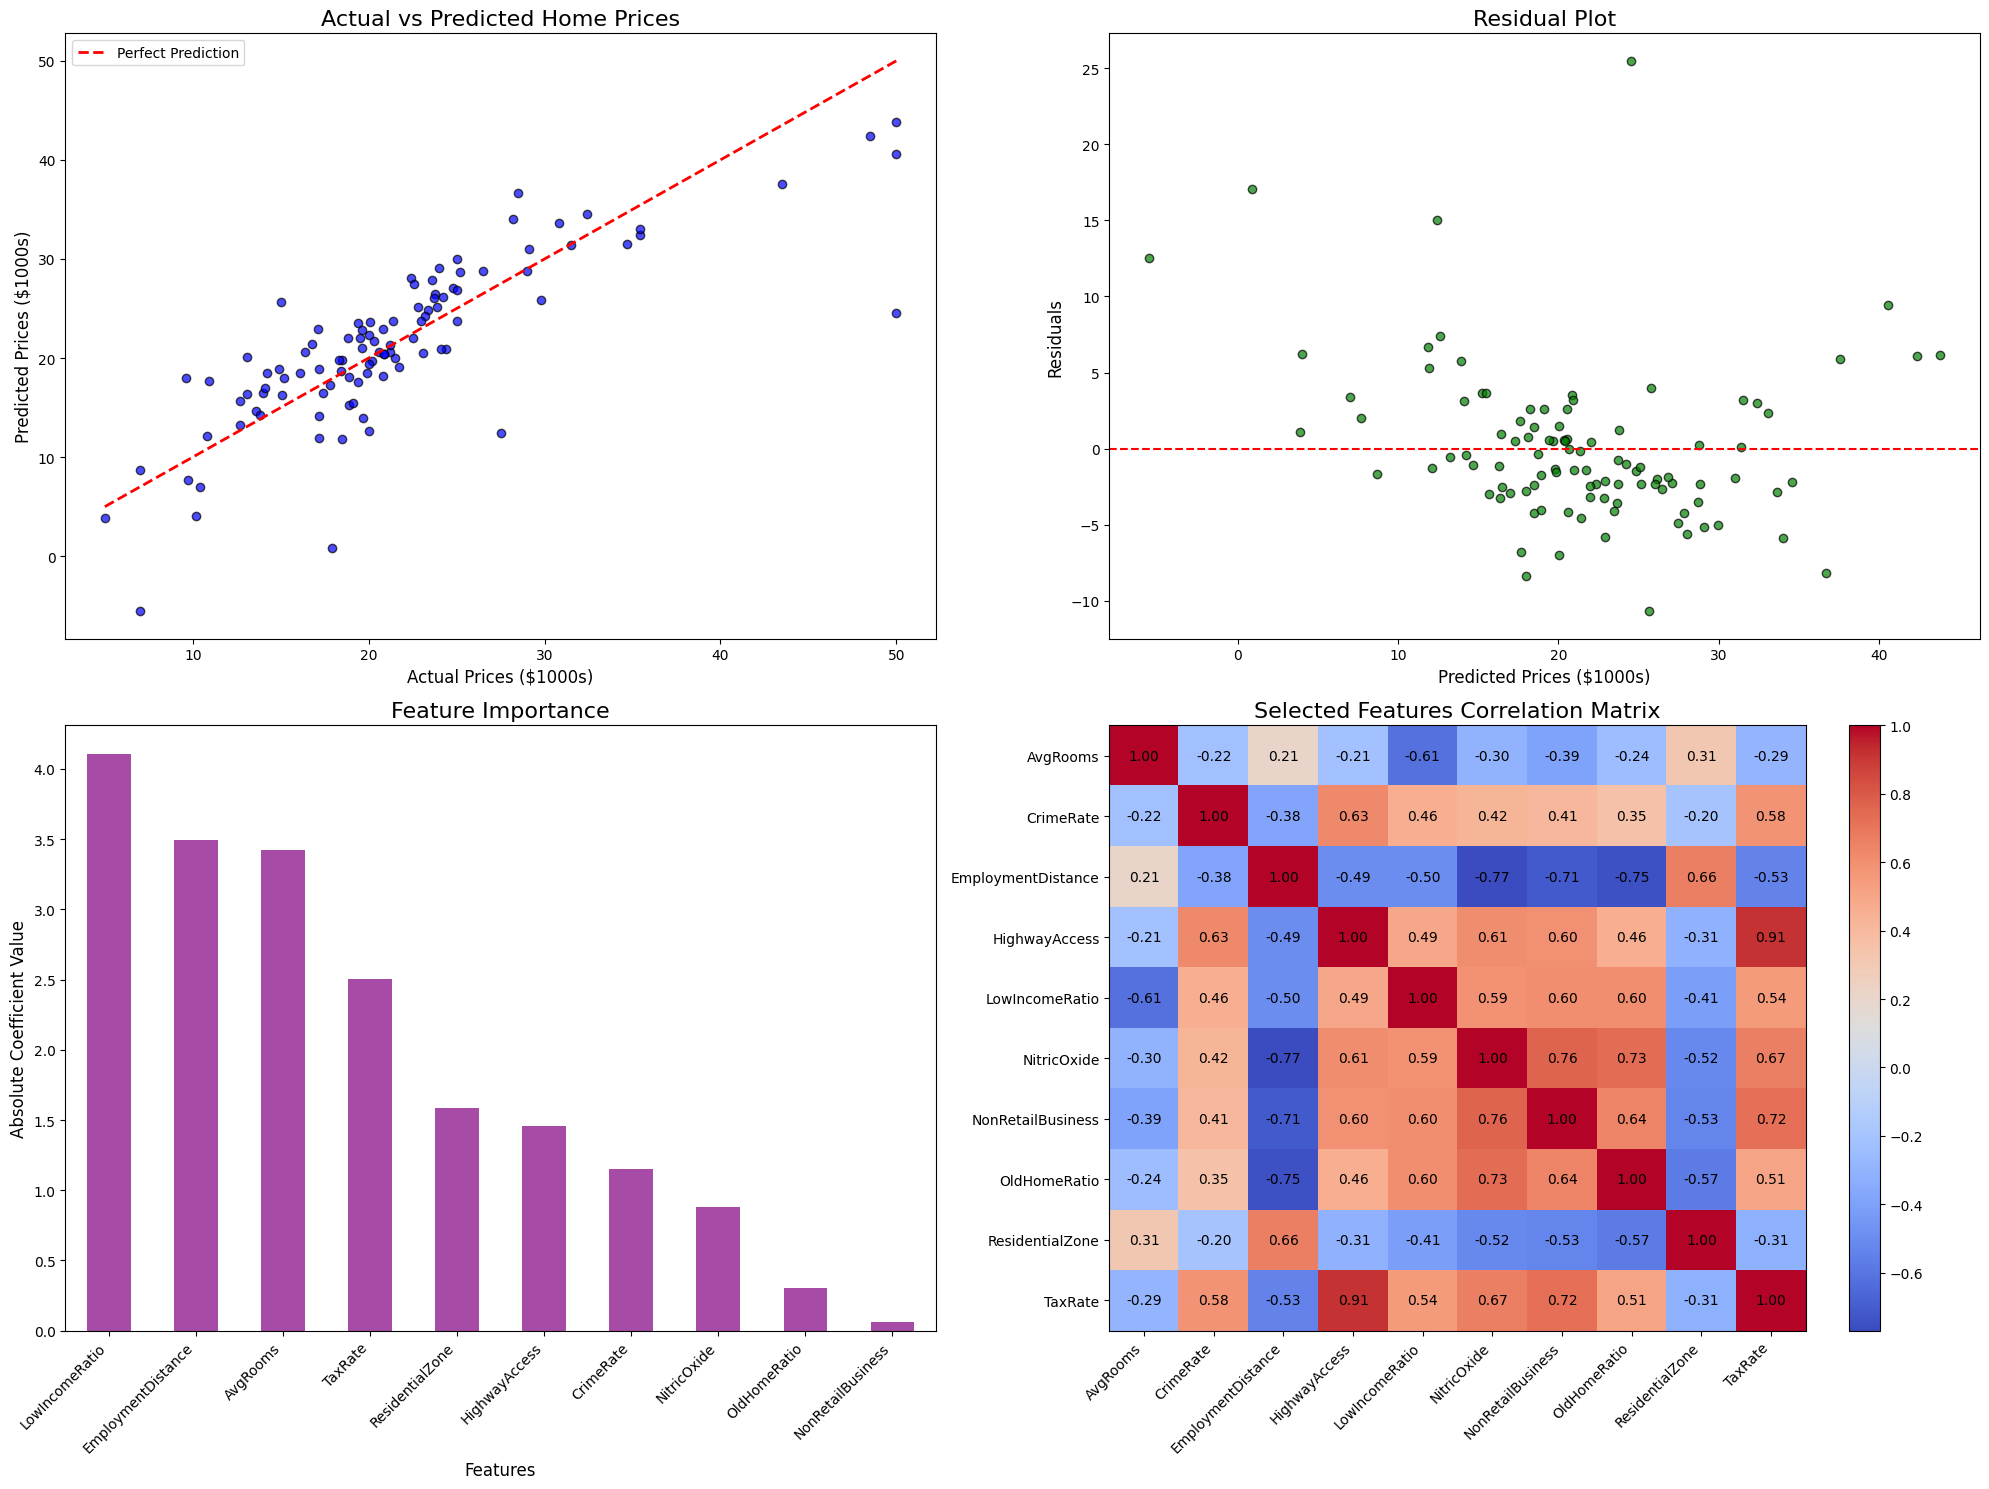


Test Sample Predictions:

Sample 1:
Features:
AvgRooms: 6.42
CrimeRate: 0.09
EmploymentDistance: 2.65
HighwayAccess: 5.00
LowIncomeRatio: 9.04
NitricOxide: 0.51
NonRetailBusiness: 4.05
OldHomeRatio: 84.10
ResidentialZone: 0.00
TaxRate: 296.00

Actual Home Price: $23600.00
Predicted Home Price: $27829.69
Prediction Error: $4229.69

Sample 2:
Features:
AvgRooms: 6.76
CrimeRate: 0.06
EmploymentDistance: 4.08
HighwayAccess: 4.00
LowIncomeRatio: 3.53
NitricOxide: 0.45
NonRetailBusiness: 6.41
OldHomeRatio: 32.90
ResidentialZone: 40.00
TaxRate: 254.00

Actual Home Price: $32400.00
Predicted Home Price: $34578.70
Prediction Error: $2178.70

Sample 3:
Features:
AvgRooms: 5.98
CrimeRate: 0.11
EmploymentDistance: 1.87
HighwayAccess: 4.00
LowIncomeRatio: 18.07
NitricOxide: 0.61
NonRetailBusiness: 27.74
OldHomeRatio: 98.80
ResidentialZone: 0.00
TaxRate: 711.00

Actual Home Price: $13600.00
Predicted Home Price: $14680.99
Prediction Error: $1080.99

Sample 4:
Features:
AvgRooms: 6.07
CrimeRate: 0.0

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep="\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = [
    'CrimeRate', 'ResidentialZone', 'NonRetailBusiness', 'CharlesRiverAccess',
    'NitricOxide', 'AvgRooms', 'OldHomeRatio', 'EmploymentDistance',
    'HighwayAccess', 'TaxRate', 'PupilTeacherRatio', 'AfricanAmericanPop',
    'LowIncomeRatio'
]
data = pd.DataFrame(data, columns=columns)
target = pd.Series(target, name='HomePrice')

plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
im = plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.title('Feature Correlation Matrix', fontsize=16)
plt.colorbar(im)
plt.xticks(range(len(columns)), columns, rotation=45, ha='right')
plt.yticks(range(len(columns)), columns)

for i in range(len(columns)):
    for j in range(len(columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

abs_corr = np.abs(corr_matrix)
high_corr_columns = set()

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        if abs_corr.iloc[i, j] > 0.6:
            high_corr_columns.add(columns[i])
            high_corr_columns.add(columns[j])

high_corr_columns = sorted(list(high_corr_columns))
print("\nColumns with high correlation (|corr| > 0.6):")
print(high_corr_columns)

data_subset = data[high_corr_columns]
target = pd.Series(target, name='HomePrice')

X_train, X_test, y_train, y_test = train_test_split(data_subset, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error: ${mae * 1000:.2f}")
print(f"Mean Squared Error: ${mse * 1000 * 1000:.2f}")
print(f"R² Score: {r2:.4f}")

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.scatter(y_test, predictions, alpha=0.7, color='blue', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Home Prices', fontsize=16)
plt.xlabel('Actual Prices ($1000s)', fontsize=12)
plt.ylabel('Predicted Prices ($1000s)', fontsize=12)
plt.legend()

plt.subplot(2, 2, 2)
residuals = y_test - predictions
plt.scatter(predictions, residuals, alpha=0.7, color='green', edgecolors='black')
plt.title('Residual Plot', fontsize=16)
plt.xlabel('Predicted Prices ($1000s)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.axhline(y=0, color='red', linestyle='--')

plt.subplot(2, 2, 3)
feature_importance = pd.Series(np.abs(model.coef_), index=high_corr_columns)
feature_importance_sorted = feature_importance.sort_values(ascending=False)
feature_importance_sorted.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Absolute Coefficient Value', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
correlation_matrix = data_subset.corr()
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.title('Selected Features Correlation Matrix', fontsize=16)
plt.colorbar(im)
plt.xticks(range(len(high_corr_columns)), high_corr_columns, rotation=45, ha='right')
plt.yticks(range(len(high_corr_columns)), high_corr_columns)

for i in range(len(high_corr_columns)):
    for j in range(len(high_corr_columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

print("\nTest Sample Predictions:")
for i in range(min(5, len(X_test))):
    actual_price = y_test.iloc[i]
    predicted_price = predictions[i]
    sample_features = X_test.iloc[i]

    print(f"\nSample {i+1}:")
    print("Features:")
    for col, val in sample_features.items():
        print(f"{col}: {val:.2f}")

    print(f"\nActual Home Price: ${actual_price * 1000:.2f}")
    print(f"Predicted Home Price: ${predicted_price * 1000:.2f}")
    print(f"Prediction Error: ${abs(actual_price - predicted_price) * 1000:.2f}")